In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Пусть заданы попарно различные узлы $x_0,\dots,x_{n}$ и значения $y_i=f(x_i)$.

Интерполяцией функции $f$ в узлах $x_i$ называется ее аппроксимация путем построения новой функции $P$ из выбранного класса (чаще всего — полиномов), такой что
$$
P(x_i)=y_i,\qquad i=0,1,\dots,n.
$$

**Задание (интерполяция Лагранжа)**.

Дана функция $f(x)$. Для нее нужно:
1) Реализовать интерполяцию Лагранжа:
$$
P_{n-1}(x)=\sum_{i=0}^{n-1} y_i\,\ell_i(x),\qquad
\ell_i(x)=\prod_{\substack{j=0\\ j\ne i}}^{n-1}\frac{x-x_j}{x_i-x_j},\quad y_i=f(x_i).
$$
2) Рассмотреть два типа узлов на $[a,b]$:  
   – равномерные: $x_i=a+i\,\frac{b-a}{n-1},\ i=0,\ldots,n-1$;  
   – Чебышёва: $x_i=\frac{a+b}{2}+\frac{b-a}{2}\cos\,\!\bigl(\frac{2i+1}{2n}\pi\bigr)$.
3) Построить графики интерполяции для нескольких количеств узлов $n$, вывести погрешности, проанализировать результаты.

**Функция для интерполяции** (вариант 23):
$$
f(x)=\frac{tanh (x^3)}{x},\qquad x\in[0,10].
$$

In [ ]:
#целевая функция
def f(x):
    x = np.asarray(x, dtype=float)
    return np.tanh(np.power(x, 3)) / np.where(x == 0, 1, x)

In [ ]:
#узлы интерполяции -- равномерные и чебышева
def uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

def chebyshev_nodes(a, b, n):
    i = np.arange(n)
    xi = np.cos((2*i + 1) * np.pi / (2*n))
    return (a + b)/2 + (b - a)*xi/2

In [ ]:
#реализация интерполяции Лагранжа
def lagrange_eval(x, y, t):
    p = np.zeros_like(t, dtype=float)
    n = len(x)
    for i in range(n):
        Li = np.ones_like(t, dtype=float)
        for j in range(n):
            if j == i:
                continue
            Li *= (t - x[j]) / (x[i] - x[j])
        p += y[i] * Li
    return p

In [ ]:
#функция построения графиков для разных случаев
def run_case(a, b, x_nodes, n):
    y_nodes = f(x_nodes)

    idx = np.argsort(x_nodes)
    x_nodes = x_nodes[idx]
    y_nodes = y_nodes[idx]

    x_interp = 0.5 * (x_nodes[:-1] + x_nodes[1:])
    y_true = f(x_interp)
    p_interp = lagrange_eval(x_nodes, y_nodes, x_interp)

    max_err = float(np.max(np.abs(p_interp - y_true)))

    x_fun = np.linspace(a, b, 1000)
    y_fun = f(x_fun)

    plt.figure(figsize=(7,4))
    plt.plot(x_fun, y_fun, color='indigo', linewidth=2, label=f'функция')
    plt.plot(x_interp, p_interp, color='darkcyan', linewidth=2, linestyle='--', label=f'результат интерполяции, n={n}')
    plt.plot([a, x_interp[0]], [f(a), p_interp[0]], color='darkcyan', linestyle='--') # эти две строчки для того, чтобы по бокам не было пусто
    plt.plot([x_interp[-1], b], [p_interp[-1], f(b)], color='darkcyan', linestyle='--')
    plt.scatter(x_interp, p_interp, color='darkcyan', s=22, zorder=1)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xlim(a, b)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Максимальная ошибка интерполяции при n={n} равна {max_err:.6e}")

В качестве результата представим графики функции и результат интерполяции для четырех количеств узлов $n = 5, 15, 50, 100$ при равномерной сетке, а также полученные при этом максимальные ошибки:
$$\max(err) = \max|f(x) - P_n(x)|.$$

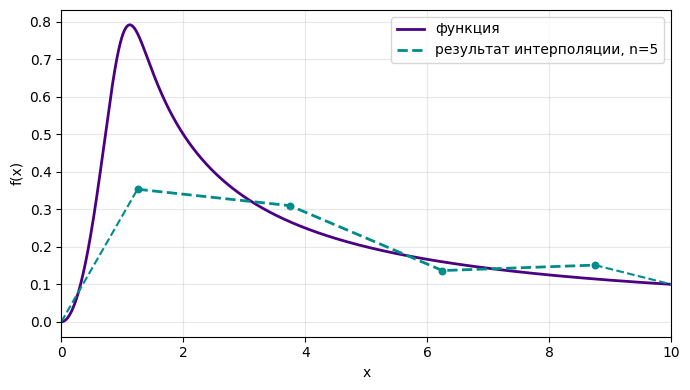

Максимальная ошибка интерполяции при n=5 равна 4.150640e-01


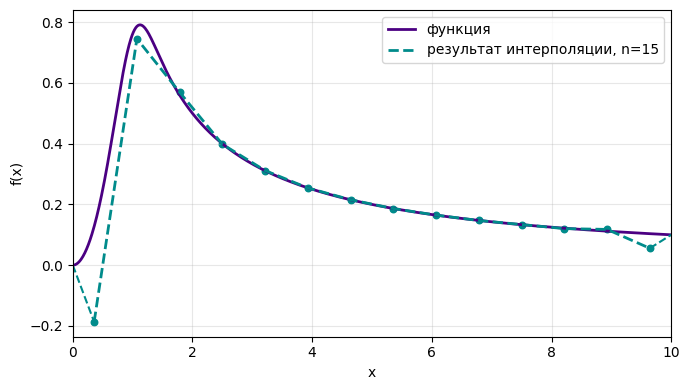

Максимальная ошибка интерполяции при n=15 равна 3.141872e-01


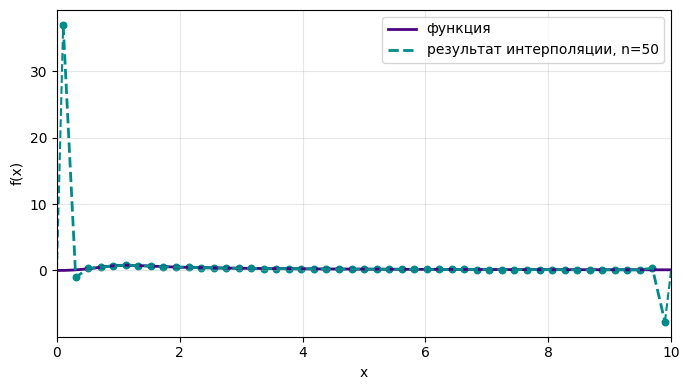

Максимальная ошибка интерполяции при n=50 равна 3.696400e+01


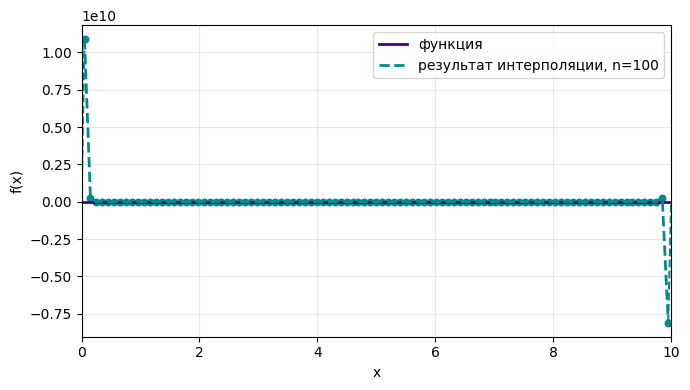

Максимальная ошибка интерполяции при n=100 равна 1.088109e+10


In [ ]:
a = 0; b = 10;
for n in (5, 15, 50, 100):
    run_case(a, b, uniform_nodes(a, b, n), n)

**Выводы по интерполяции с равномерными узлами:**
- при росте количества узлов ошибка интерполяции сначала уменьшается,
- при некотором достаточно большом $n$ наблюдается феномен Рунге, резкий рост погрешности интерполяции с равномерными узлами.

Теперь для тех же количеств узлов построим графики интерполяции с узлами Чебышева.

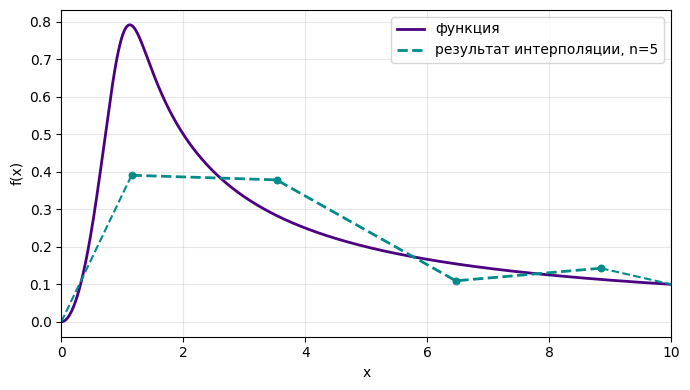

Максимальная ошибка интерполяции при n=5 равна 3.993736e-01


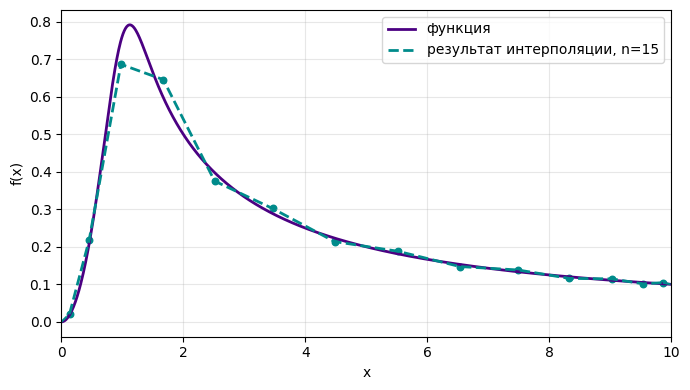

Максимальная ошибка интерполяции при n=15 равна 6.276049e-02


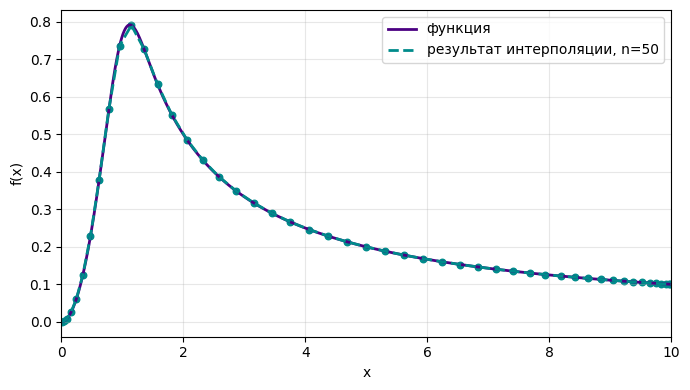

Максимальная ошибка интерполяции при n=50 равна 9.359806e-05


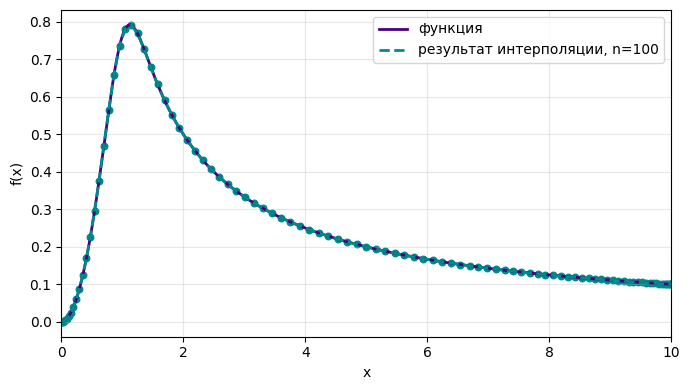

Максимальная ошибка интерполяции при n=100 равна 9.589023e-09


In [ ]:
for n in (5, 15, 50, 100):
    run_case(a, b, chebyshev_nodes(a, b, n), n)

**Выводы по интерполяции с узлами Чебышева:**
- при росте количества узлов ошибка интерполяции уменьшается, при $n=50$ почти достигает машинной точности,
- ошибка интерполяции с узлами Чебышева для каждого $n$ меньше, чем для интерполяции с равномерными узлами.

**Почему узлы Чебышева минимизируют ошибку интерполяции?** (это пример ответа на доп. вопрос)

Пусть $f\in C^{n}[a,b]$ и $P_{n-1}$ — полином Лагранжа степени $\le n-1$, построенный по узлам
$a\le x_1<\dots<x_n\le b$. Формула погрешности интерполяции:
$$
f(x)-P_{n-1}(x)
=\frac{f^{(n)}(\xi_x)}{n!}\,\omega_n(x),
\qquad
\omega_n(x)=\prod_{k=1}^{n}(x-x_k),\quad \xi_x\in(a,b).
$$

Следовательно,
$$
||f-P_{n-1}||_{C[a,b]} \le \frac{\|f^{(n)}\|_{C[a,b]}}{n!}\, \max_{x\in[a,b]}|\omega_n(x)|
$$
Так как функция $f$ фиксирована, уменьшить максимальную погрешность можно, выбрав узлы $\{x_k\}$, которые минимизируют величину $\max_{x\in[a,b]}|\omega_n(x)|$.

Перенесём отрезок $[a,b]$ линейным отображением $x=\phi(t)=\tfrac{a+b}{2}+\tfrac{b-a}{2}\,t$ на $[-1,1]$.

Тогда $\omega_n(x)=\bigl(\tfrac{b-a}{2}\bigr)^{n}\,\Omega_n(t)$, где $\Omega_n$ — многочлен степени $n$ со старшим коэффициентом равным одному.

По свойству полиномов Чебышева $T_n$ минимум $\max_{t\in[-1,1]}|\Omega_n(t)|$ достигается на
$\Omega_n(t)=2^{1-n}T_n(t)$, так как эти полиномы наименее отклоняются от нуля на $[-1,1]$ и имеют старший коэффициент $2^{n-1}$. Нулями многочленов Чебышева на $[-1,1]$ являются
$t_k=\,\cos\,\!\bigl(\tfrac{2k-1}{2n}\pi\bigr)$,
поэтому искомые узлы на $[a,b]$ равны
$$
x_k=\phi(t_k)=\tfrac{a+b}{2}+\tfrac{b-a}{2}\cos\!\Bigl(\tfrac{2k-1}{2n}\pi\Bigr).
$$

построить график зависимости узлов от ошибки

In [ ]:
def calc_error(a, b, x_nodes, n_points=1000):
    y_nodes = f(x_nodes)

    idx = np.argsort(x_nodes)
    x_nodes = x_nodes[idx]
    y_nodes = y_nodes[idx]

    x_eval = np.linspace(a, b, n_points)
    y_true = f(x_eval)
    y_interp = lagrange_eval(x_nodes, y_nodes, x_eval)

    # Максимальная ошибка
    max_err = np.max(np.abs(y_interp - y_true))
    return max_err

n=5: Uniform error = 4.601975e-01, Chebyshev error = 4.143617e-01
n=8: Uniform error = 3.890764e-01, Chebyshev error = 2.446274e-01
n=11: Uniform error = 4.862957e-01, Chebyshev error = 9.670900e-02
n=14: Uniform error = 1.961467e-01, Chebyshev error = 9.334802e-02
n=17: Uniform error = 8.387394e-01, Chebyshev error = 3.676982e-02
n=20: Uniform error = 4.357923e-01, Chebyshev error = 2.536807e-02
n=23: Uniform error = 1.430680e+00, Chebyshev error = 1.712356e-02
n=26: Uniform error = 2.319071e+00, Chebyshev error = 5.649358e-03
n=29: Uniform error = 1.607930e+00, Chebyshev error = 5.869080e-03
n=32: Uniform error = 7.335578e+00, Chebyshev error = 3.369449e-03
n=35: Uniform error = 1.145487e+00, Chebyshev error = 1.336302e-03
n=38: Uniform error = 1.874972e+01, Chebyshev error = 1.234017e-03
n=41: Uniform error = 1.348125e+01, Chebyshev error = 5.814015e-04
n=44: Uniform error = 4.058583e+01, Chebyshev error = 2.881042e-04
n=47: Uniform error = 4.915990e+01, Chebyshev error = 2.282850e-

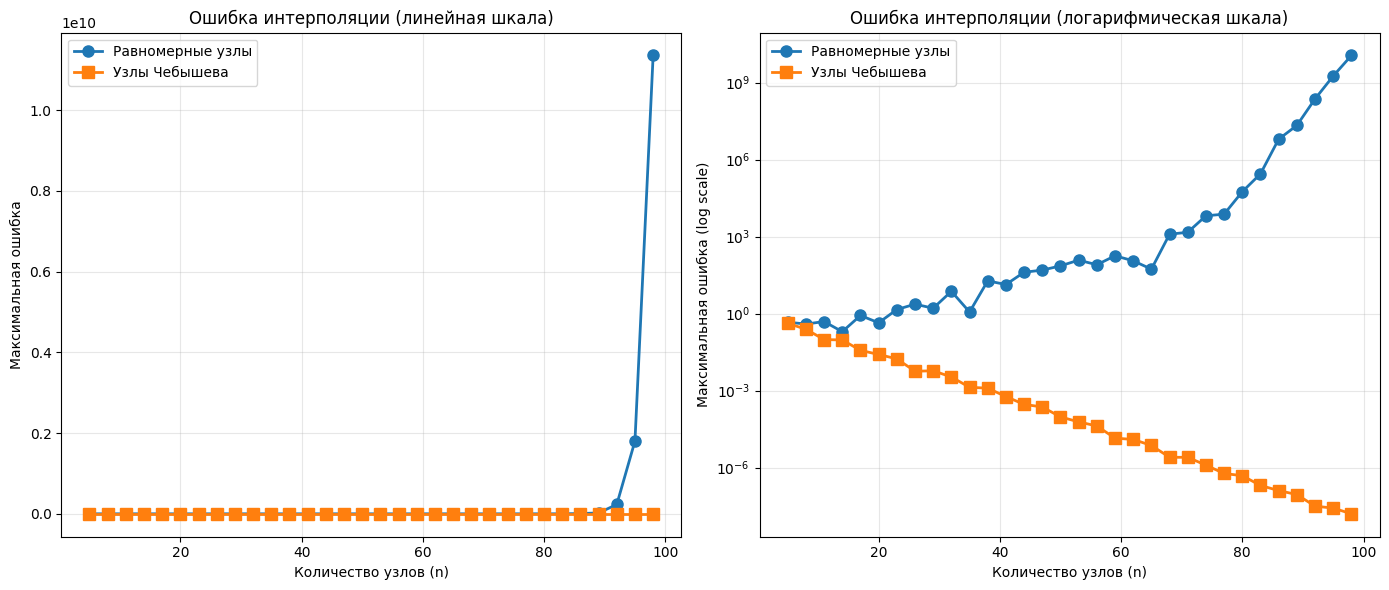


Таблица результатов:
 Количество узлов  Ошибка (равномерные)  Ошибка (Чебышев)  Отношение ошибок
                5          4.601975e-01      4.143617e-01      1.110618e+00
                8          3.890764e-01      2.446274e-01      1.590485e+00
               11          4.862957e-01      9.670900e-02      5.028443e+00
               14          1.961467e-01      9.334802e-02      2.101241e+00
               17          8.387394e-01      3.676982e-02      2.281054e+01
               20          4.357923e-01      2.536807e-02      1.717877e+01
               23          1.430680e+00      1.712356e-02      8.355039e+01
               26          2.319071e+00      5.649358e-03      4.105017e+02
               29          1.607930e+00      5.869080e-03      2.739663e+02
               32          7.335578e+00      3.369449e-03      2.177085e+03
               35          1.145487e+00      1.336302e-03      8.572067e+02
               38          1.874972e+01      1.234017e-03      1.5

In [ ]:
def plot_errors(a, b, n_values):
    uniform_errors = []
    chebyshev_errors = []

    for n in n_values:
        # для равномерных узлов
        uni_nodes = uniform_nodes(a, b, n)
        uni_error = calc_error(a, b, uni_nodes)
        uniform_errors.append(uni_error)

        # для узлов Чебышева
        cheb_nodes = chebyshev_nodes(a, b, n)
        cheb_error = calc_error(a, b, cheb_nodes)
        chebyshev_errors.append(cheb_error)

        print(f"n={n}: Uniform error = {uni_error:.6e}, Chebyshev error = {cheb_error:.6e}")

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(n_values, uniform_errors, 'o-', linewidth=2, markersize=8, label='Равномерные узлы')
    plt.plot(n_values, chebyshev_errors, 's-', linewidth=2, markersize=8, label='Узлы Чебышева')
    plt.xlabel('Количество узлов (n)')
    plt.ylabel('Максимальная ошибка')
    plt.title('Ошибка интерполяции (линейная шкала)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.semilogy(n_values, uniform_errors, 'o-', linewidth=2, markersize=8, label='Равномерные узлы')
    plt.semilogy(n_values, chebyshev_errors, 's-', linewidth=2, markersize=8, label='Узлы Чебышева')
    plt.xlabel('Количество узлов (n)')
    plt.ylabel('Максимальная ошибка (log scale)')
    plt.title('Ошибка интерполяции (логарифмическая шкала)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    return uniform_errors, chebyshev_errors

a = 0
b = 10
n_values = [i for i in range(5, 100, 3)]

uniform_errors, chebyshev_errors = plot_errors(a, b, n_values)

results_df = pd.DataFrame({
    'Количество узлов': n_values,
    'Ошибка (равномерные)': uniform_errors,
    'Ошибка (Чебышев)': chebyshev_errors,
    'Отношение ошибок': [u/c for u, c in zip(uniform_errors, chebyshev_errors)]
})

print("\nТаблица результатов:")
print(results_df.to_string(index=False, float_format=lambda x: f"{x:.6e}"))